In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('data.csv')



In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df = df.dropna(axis=1)

In [7]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Problem 1 & 2

In [9]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [10]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
le = LabelEncoder()

# Encode the target variable 'y'
y = le.fit_transform(y)

df['diagnosis'] = y

In [11]:
# Create a DataFrame to see the mapping

# Encode the target variable 'y'
y_encoded = le.fit_transform(y)

# Map encoded values back to original labels
y_decoded = le.inverse_transform(y_encoded)
mapping_df = pd.DataFrame({'Original Label': y, 'Encoded Value': y_encoded, 'Decoded Label': y_decoded})

# Display the mapping
print(mapping_df)
 
#  M --> 1
# B --> 0

     Original Label  Encoded Value  Decoded Label
0                 1              1              1
1                 1              1              1
2                 1              1              1
3                 1              1              1
4                 1              1              1
..              ...            ...            ...
564               1              1              1
565               1              1              1
566               1              1              1
567               1              1              1
568               0              0              0

[569 rows x 3 columns]


In [12]:
# Split the dataset into training, validation, and test sets (80:10:10)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=5)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=5)

In [13]:
# Initialize and train the logistic regression model
logistic_regression_model = LogisticRegression(random_state=5)
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the validation set
y_valid_pred = logistic_regression_model.predict(X_valid)

# Evaluate the model on the validation set
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f"Validation Accuracy: {valid_accuracy:.2f}")

# Make predictions on the test set
y_test_pred = logistic_regression_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")


Validation Accuracy: 0.53
Test Accuracy: 0.63


## Problem 3

### 3.1

In [14]:
model_3_1 = LogisticRegression(solver ='newton-cg',random_state = 5)

In [15]:
model_3_1.fit(X_train,y_train)

C:\Users\goraiastik2000\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\goraiastik2000\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\goraiastik2000\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(random_state=5, solver='newton-cg')

In [16]:
# Make predictions on the validation set
y_valid_pred_3_1 = model_3_1.predict(X_valid)

# Evaluate the model on the validation set
valid_accuracy_3_1 = accuracy_score(y_valid, y_valid_pred_3_1)
# Make predictions on the test set
y_test_pred_3_1 = model_3_1.predict(X_test)

# Evaluate the model on the test set
test_accuracy_3_1 = accuracy_score(y_test, y_test_pred_3_1)


### 3.2

In [17]:
model_3_2 = LogisticRegression(solver='lbfgs', random_state = 5,max_iter=10000)

In [18]:
model_3_2.fit(X_train,y_train)

LogisticRegression(max_iter=10000, random_state=5)

In [19]:
# Make predictions on the validation set
y_valid_pred_3_2 = model_3_2.predict(X_valid)

# Evaluate the model on the validation set
valid_accuracy_3_2 = accuracy_score(y_valid, y_valid_pred_3_2)
# Make predictions on the test set
y_test_pred_3_2 = model_3_2.predict(X_test)

# Evaluate the model on the test set
test_accuracy_3_2 = accuracy_score(y_test, y_test_pred_3_2)

### 3.3

In [20]:
model_3_3 = LogisticRegression(solver ='liblinear',random_state = 5)

In [21]:
model_3_3.fit(X_train,y_train)

LogisticRegression(random_state=5, solver='liblinear')

In [22]:
# Make predictions on the validation set
y_valid_pred_3_3 = model_3_3.predict(X_valid)

# Evaluate the model on the validation set
valid_accuracy_3_3 = accuracy_score(y_valid, y_valid_pred_3_3)
# Make predictions on the test set
y_test_pred_3_3 = model_3_3.predict(X_test)

# Evaluate the model on the test set
test_accuracy_3_3 = accuracy_score(y_test, y_test_pred_3_3)

#### Coefficient for 3 models

In [23]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']

In [24]:
data = {
    'Solver Name ': ['newton-cg', 'lbfgs', 'liblinear'],
    'Coefficients' : [model_3_1.coef_[0],model_3_2.coef_[0],model_3_3.coef_[0]],
    'Accuracy on Validation':[valid_accuracy_3_1,valid_accuracy_3_2,valid_accuracy_3_3],
    'Accuracy on Test' : [test_accuracy_3_1,test_accuracy_3_2,test_accuracy_3_3]
}

In [25]:
accuracy_3_df = pd.DataFrame(data)
accuracy_3_df

,Solver Name,Coefficients,Accuracy on Validation,Accuracy on Test
0,newton-cg,"[7.424198658827765e-10, -0.08040532726446974, ...",0.947368,0.947368
1,lbfgs,"[-1.9084971302317336e-10, -3.918058645527435e-...",0.526316,0.631579
2,liblinear,"[5.532389223374363e-10, -0.005879220152696298,...",0.929825,0.912281


### Problem 4

#### 4.1

In [34]:
model_4_1 = LogisticRegression(solver='liblinear', penalty='l1')
model_4_1.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [36]:
# Make predictions on the validation set
y_valid_pred_4_1 = model_4_1.predict(X_valid)

# Evaluate the model on the validation set
valid_accuracy_4_1 = accuracy_score(y_valid, y_valid_pred_4_1)
# Make predictions on the test set
y_test_pred_4_1 = model_4_1.predict(X_test)

# Evaluate the model on the test set
test_accuracy_4_1 = accuracy_score(y_test, y_test_pred_4_1)

### 4.2

In [37]:
model_4_2 = LogisticRegression(solver='liblinear', penalty='l2')
model_4_2.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [38]:
# Make predictions on the validation set
y_valid_pred_4_2 = model_4_2.predict(X_valid)

# Evaluate the model on the validation set
valid_accuracy_4_2 = accuracy_score(y_valid, y_valid_pred_4_2)
# Make predictions on the test set
y_test_pred_4_2 = model_4_2.predict(X_test)

# Evaluate the model on the test set
test_accuracy_4_2 = accuracy_score(y_test, y_test_pred_4_2)

### 4.3

In [39]:
model_4_3 = LogisticRegression(solver='lbfgs', penalty='none')
model_4_3.fit(X_train,y_train)

LogisticRegression(penalty='none')

In [41]:
# Make predictions on the validation set
y_valid_pred_4_3 = model_4_3.predict(X_valid)

# Evaluate the model on the validation set
valid_accuracy_4_3 = accuracy_score(y_valid, y_valid_pred_4_3)
# Make predictions on the test set
y_test_pred_4_3 = model_4_3.predict(X_test)

# Evaluate the model on the test set
test_accuracy_4_3 = accuracy_score(y_test, y_test_pred_4_3)

Report

In [44]:
data_4 = {
    'Penalties' :['l1','l2','none'],
    'Coefficients' : [model_4_1.coef_[0],model_4_2.coef_[0],model_4_3.coef_[0]],
    'Accuracy on Validation':[valid_accuracy_4_1,valid_accuracy_4_2,valid_accuracy_4_3],
    'Accuracy on Test' : [test_accuracy_4_1,test_accuracy_4_2,test_accuracy_4_3]
}

In [45]:
accuracy_4_df = pd.DataFrame(data_4)
accuracy_4_df

,Penalties,Coefficients,Accuracy on Validation,Accuracy on Test
0,l1,"[1.1023336010828995e-09, -1.2810048061909258, ...",0.947368,0.964912
1,l2,"[5.532389223374363e-10, -0.005879220152696298,...",0.929825,0.912281
2,none,"[-1.908497130231734e-10, -3.9180586455274343e-...",0.526316,0.631579


### Problem 5

In [48]:

# Define a range of L1 penalty values to test
l1_penalty_values = [0.1, 0.25, 0.75, 0.9]

# Create a dictionary to store coefficients for each penalty value
coefficients_by_penalty = {}

for l1_penalty in l1_penalty_values:
    # Initialize and train the logistic regression model with the current penalty
    model_5 = LogisticRegression(penalty='l1', C=1/l1_penalty, solver='liblinear', random_state=5)
    model_5.fit(X_train, y_train)
    
    # Store the coefficients in the dictionary
    coefficients_by_penalty[l1_penalty] = logistic_regression_model.coef_[0]

# Create a DataFrame to display coefficients for each penalty value
coefficients_df = pd.DataFrame(coefficients_by_penalty, index=X.columns)

# Display the coefficients table
coefficients_df

C:\Users\goraiastik2000\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,0.10,0.25,0.75,0.90
id,1.137295e-09,1.137295e-09,1.137295e-09,1.137295e-09
radius_mean,-1.292731e+00,-1.292731e+00,-1.292731e+00,-1.292731e+00
texture_mean,-1.022562e-01,-1.022562e-01,-1.022562e-01,-1.022562e-01
perimeter_mean,-8.501274e-02,-8.501274e-02,-8.501274e-02,-8.501274e-02
area_mean,9.917835e-03,9.917835e-03,9.917835e-03,9.917835e-03
smoothness_mean,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
compactness_mean,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
concavity_mean,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
concave points_mean,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
symmetry_mean,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


### Problem 6

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB  # or MultinomialNB for discrete features
import matplotlib.pyplot as plt

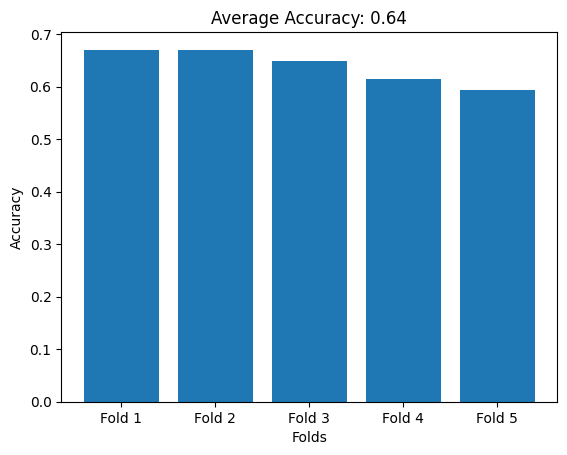

Average Accuracy: 0.64


In [51]:
X = X_train
y = y_train
# Initialize the Naive Bayes classifier
naive_bayes = GaussianNB()  # or MultinomialNB() for discrete features

# Perform 5-fold cross-validation to estimate accuracy
cv = KFold(n_splits=5, shuffle=True, random_state=5)  # 5-fold cross-validation with shuffling

accuracy_scores = cross_val_score(naive_bayes, X, y, cv=cv, scoring='accuracy')

# Calculate the average accuracy
average_accuracy = np.mean(accuracy_scores)

# Plot the bar graph of accuracy
plt.bar(['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'], accuracy_scores)
plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.title(f'Average Accuracy: {average_accuracy:.2f}')
plt.show()

print(f'Average Accuracy: {average_accuracy:.2f}')